<a href="https://colab.research.google.com/github/RafsanJany-44/ARC/blob/master/Activity_Recognition_EEG__2022_12_30.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


###Function

In [2]:
!pip install imbalanced-learn

from imblearn.over_sampling import SMOTE

def balance(X_temp, y_temp):
  smote = SMOTE()
  X_temp, y_temp= smote.fit_resample(X_temp, y_temp)
  return pd.concat([pd.DataFrame(X_temp), pd.DataFrame(y_temp)], axis=1)



def models_check_box(models):
  import ipywidgets as widgets
  from IPython.display import display
  new_keys=[]
  for i in models:
    i=widgets.Checkbox(
      value=False,
      description=str(i),
      disabled=False,
      indent=False
      )
    display(i)
    new_keys.append(i)
  return new_keys

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/


#Starting

In [13]:
import numpy as np
import pandas as pd
#dataset=pd.read_excel("/content/drive/MyDrive/EEG_CNU_Activity Recognition/EEG_CNU_Resting, walking, working and Reading_Control_2022.12.30_1.xlsx")
dataset=pd.read_excel("/content/drive/MyDrive/Iqram Sir/EEG_CNU_Resting, walking, working and Reading_Control_2022.12.30_1.xlsx")

target = "Activity"
result = {}

In [14]:
dataset.head()

,Activity,Status,Epoch,MeanP_Alpha_Fz,MeanP_Beta_Fz,MeanP_Theta_Fz,MeanP_Delta_Fz,MeanP_Gamma_Fz,MeanP_Alpha_T7,MeanP_Beta_T7,...,pdBSI_gamma_T,pdBSI_T,DAR,DTR,DTABR,Relative Power_Alpha_Global,Relative Power_Beta_Global,Relative Power_Theta_Global,Relative Power_Delta_Global,Relative Power_Gamma_Global
0,Resting,Control,0,0.000008,0.000017,0.000008,0.000037,0.000006,0.000015,0.000047,...,0.459030,0.214583,12.438393,5.539580,5.283557,0.358154,0.639771,0.749628,4.031903,0.220545
1,Resting,Control,1,0.000010,0.000023,0.000009,0.000064,0.000008,0.000022,0.000059,...,0.330678,0.153688,8.122782,5.075034,3.541553,0.457695,0.806208,0.723662,3.759249,0.253186
2,Resting,Control,2,0.000008,0.000023,0.000006,0.000019,0.000007,0.000018,0.000065,...,0.401001,0.197538,7.248717,4.694718,2.869184,0.501419,1.059244,0.737332,3.320235,0.381769
3,Resting,Control,3,0.000011,0.000019,0.000010,0.000029,0.000006,0.000012,0.000038,...,0.395906,0.157050,8.925147,4.484127,4.446999,0.497909,0.710690,0.907816,3.653423,0.230162
4,Resting,Control,4,0.000007,0.000010,0.000007,0.000010,0.000002,0.000013,0.000028,...,0.430493,0.155118,13.888878,5.672066,6.891941,0.429825,0.569204,0.849345,4.001597,0.150029


In [15]:
dataset.shape

(1711, 89)

In [16]:
dataset[target].value_counts()

Reading    793
Walking    408
Working    267
Resting    243
Name: Activity, dtype: int64

In [17]:
set(list(dataset['Activity']))

{'Reading', 'Resting', 'Walking', 'Working'}

In [18]:
from sklearn.preprocessing import LabelEncoder
encoder=LabelEncoder()
dataset[target]=encoder.fit_transform(dataset[target])

In [19]:
set(list(dataset['Activity']))

{0, 1, 2, 3}

###Spliting into X and y

In [20]:
X =  dataset.loc[:,dataset.columns != target]  # removing Activity 
X =  X.loc[:,X.columns != "Status"]            # removing Status
X =  X.loc[:,X.columns != "Epoch"]             # removing Epoch
y = dataset["Activity"]

X.head(10)

,MeanP_Alpha_Fz,MeanP_Beta_Fz,MeanP_Theta_Fz,MeanP_Delta_Fz,MeanP_Gamma_Fz,MeanP_Alpha_T7,MeanP_Beta_T7,MeanP_Theta_T7,MeanP_Delta_T7,MeanP_Gamma_T7,...,pdBSI_gamma_T,pdBSI_T,DAR,DTR,DTABR,Relative Power_Alpha_Global,Relative Power_Beta_Global,Relative Power_Theta_Global,Relative Power_Delta_Global,Relative Power_Gamma_Global
0,0.000008,0.000017,0.000008,0.000037,0.000006,0.000015,0.000047,0.000016,0.000094,0.000019,...,0.459030,0.214583,12.438393,5.539580,5.283557,0.358154,0.639771,0.749628,4.031903,0.220545
1,0.000010,0.000023,0.000009,0.000064,0.000008,0.000022,0.000059,0.000017,0.000150,0.000021,...,0.330678,0.153688,8.122782,5.075034,3.541553,0.457695,0.806208,0.723662,3.759249,0.253186
2,0.000008,0.000023,0.000006,0.000019,0.000007,0.000018,0.000065,0.000016,0.000075,0.000028,...,0.401001,0.197538,7.248717,4.694718,2.869184,0.501419,1.059244,0.737332,3.320235,0.381769
3,0.000011,0.000019,0.000010,0.000029,0.000006,0.000012,0.000038,0.000012,0.000120,0.000014,...,0.395906,0.157050,8.925147,4.484127,4.446999,0.497909,0.710690,0.907816,3.653423,0.230162
4,0.000007,0.000010,0.000007,0.000010,0.000002,0.000013,0.000028,0.000024,0.000170,0.000010,...,0.430493,0.155118,13.888878,5.672066,6.891941,0.429825,0.569204,0.849345,4.001597,0.150029
5,0.000008,0.000010,0.000007,0.000019,0.000002,0.000013,0.000031,0.000019,0.000082,0.000013,...,0.380013,0.158437,9.159433,4.909690,4.405570,0.494096,0.687221,0.812251,3.785048,0.221383
6,0.000005,0.000007,0.000005,0.000013,0.000002,0.000011,0.000018,0.000024,0.000170,0.000006,...,0.221696,0.052372,8.562337,5.475070,4.491270,0.527217,0.668711,0.770164,3.853441,0.180467
7,0.000005,0.000007,0.000006,0.000023,0.000002,0.000008,0.000022,0.000011,0.000059,0.000008,...,0.348357,0.114897,8.628646,5.287281,3.925721,0.475599,0.719244,0.764508,3.833454,0.207195
8,0.000006,0.000009,0.000006,0.000012,0.000002,0.000018,0.000032,0.000028,0.000130,0.000011,...,0.402960,0.150786,10.083337,4.565816,5.384672,0.482293,0.620810,0.933737,3.798965,0.164195
9,0.000014,0.000021,0.000015,0.000021,0.000004,0.000009,0.000020,0.000010,0.000044,0.000007,...,0.386707,0.161905,5.262178,2.699725,3.125619,0.659929,0.855344,1.188749,3.079654,0.216324


###USing SMOTE for balancing

In [21]:
new_dataset =  balance(X,y)

In [22]:
new_dataset[target].value_counts()

1    793
2    793
0    793
3    793
Name: Activity, dtype: int64

#Feature Selection

In [23]:
number_of_feat = 30

###ANOVA with f classifciation

In [24]:
from sklearn.datasets import make_classification
from sklearn.feature_selection import SelectKBest
from sklearn.feature_selection import f_classif
import pandas as pd



fs = SelectKBest(score_func=f_classif, k=5)
fit = fs.fit(X,y)
dfscores = pd.DataFrame(fit.scores_)
dfcolumns = pd.DataFrame(X.columns)

featureScores = pd.concat([dfcolumns,dfscores],axis=1)

featureScores.columns = ['Best_columns','Score_ANOVA'] 

lyst = featureScores.nlargest(number_of_feat,'Score_ANOVA')

#lyst.to_csv('Filter_Method_ANOVA_with_f_classif.csv')

list_of_feat = list(lyst["Best_columns"])

###Embedded Method

In [ ]:

from sklearn.linear_model import LassoCV
reg = LassoCV()
reg.fit(X, y)
print("Best alpha using built-in LassoCV: %f" % reg.alpha_)
print("Best score using built-in LassoCV: %f" %reg.score(X,y))
coef = pd.Series(reg.coef_, index = X.columns)

print("Lasso picked " + str(sum(coef != 0)) + " variables and eliminated the other " +  str(sum(coef == 0)) + " variables")

imp_coef = coef.sort_values()

list_of_feat=[]


for i in range(coef.shape[0]):
  if coef[i]!=0:
    list_of_feat.append(dataset.iloc[:0,i+3].name)
    
df = pd.DataFrame(list_of_feat, columns=['Best_Features'])

#df.to_csv("Embedded_Method.csv")

list_of_feat = list(df["Best_Features"])
if number_of_feat < len(list_of_feat):
  list_of_feat = list_of_feat[:number_of_feat]

/usr/local/lib/python3.8/dist-packages/sklearn/linear_model/_coordinate_descent.py:633: ConvergenceWarning:

Objective did not converge. You might want to increase the number of iterations. Duality gap: 0.4267169530156707, tolerance: 0.21672448830409385

/usr/local/lib/python3.8/dist-packages/sklearn/linear_model/_coordinate_descent.py:633: ConvergenceWarning:

Objective did not converge. You might want to increase the number of iterations. Duality gap: 0.5367691825176735, tolerance: 0.21672448830409385

/usr/local/lib/python3.8/dist-packages/sklearn/linear_model/_coordinate_descent.py:633: ConvergenceWarning:

Objective did not converge. You might want to increase the number of iterations. Duality gap: 0.44178979448417977, tolerance: 0.21672448830409385

/usr/local/lib/python3.8/dist-packages/sklearn/linear_model/_coordinate_descent.py:633: ConvergenceWarning:

Objective did not converge. You might want to increase the number of iterations. Duality gap: 0.43952068898738617, tolerance:

Best alpha using built-in LassoCV: 0.026444
Best score using built-in LassoCV: 0.462189
Lasso picked 76 variables and eliminated the other 180 variables


/usr/local/lib/python3.8/dist-packages/sklearn/linear_model/_coordinate_descent.py:647: ConvergenceWarning:

Objective did not converge. You might want to increase the number of iterations, check the scale of the features or consider increasing regularisation. Duality gap: 2.166e+02, tolerance: 2.256e-01



###Pearson's with f regression

In [ ]:
from sklearn.datasets import make_regression
from sklearn.feature_selection import SelectKBest
from sklearn.feature_selection import f_regression
import pandas as pd


fs = SelectKBest(score_func=f_regression, k=5)
fit = fs.fit(X,y)

dfscores = pd.DataFrame(fit.scores_)
dfcolumns = pd.DataFrame(dataset.columns)
featureScores = pd.concat([dfcolumns,dfscores],axis=1)

featureScores.columns = ['Best_columns','Score_pearsons'] 


lyst = featureScores.nlargest(number_of_feat,'Score_pearsons')

#lyst.to_csv('Filter_Method_Pearson’s_with_f_regression.csv')

list_of_feat = list(lyst["Best_columns"])

###Sequential Feature Selection

In [ ]:
from sklearn.feature_selection import SequentialFeatureSelector
from sklearn.neighbors import KNeighborsClassifier
knn = KNeighborsClassifier(n_neighbors=3)
sfs = SequentialFeatureSelector(knn, n_features_to_select=number_of_feat)
sfs.fit(X, y)
list_of_feat=[]
list_of_feat=list(sfs.get_feature_names_out(X.columns))

df = pd.DataFrame(list_of_feat, columns=['Best_Features'])

#df.to_csv("Filter_Method_Sequential_feat_Selection_KNN.csv")

list_of_feat = list(df["Best_Features"])
if number_of_feat < len(list_of_feat):
  list_of_feat = list_of_feat[:number_of_feat]

KeyboardInterrupt: ignored

###Feature list

In [ ]:
dfcolumns = pd.DataFrame(list_of_feat)
print(dfcolumns)

                              0
0       Relative Power_Theta_T7
1       Relative Power_Gamma_C1
2   Relative Power_Theta_Global
3        Relative Power_Beta_Fz
4    Relative Power_Beta_Global
5       Relative Power_Theta_Oz
6       Relative Power_Theta_C2
7       Relative Power_Theta_T8
8                MeanP_Gamma_C2
9                MeanP_Gamma_T8
10               MeanP_Gamma_Oz
11       Relative Power_Beta_T7
12  Relative Power_Gamma_Global
13                MeanP_Beta_C1
14      Relative Power_Theta_Fz
15               MeanP_Theta_C1
16               MeanP_Alpha_C1
17      Relative Power_Alpha_Fz
18               MeanP_Gamma_Fz
19       Relative Power_Beta_C1
20                pdBSI_alpha_C
21      Relative Power_Gamma_Oz
22      Relative Power_Gamma_C2
23      Relative Power_Gamma_T8
24               Total Power_C1
25      Relative Power_Theta_C1
26                      pdBSI_C
27                pdBSI_gamma_C
28               MeanP_Delta_C1
29               MeanP_Theta_Oz


#Data Spliting

In [27]:
X_new = new_dataset[list_of_feat]
y_new = new_dataset[target]

In [28]:
X_new.shape

(3172, 30)

In [29]:
y_new.shape

(3172,)

In [30]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X_new, y_new, test_size = 0.2, random_state = 0)



---



# **Training**



---



#ADABOOST

In [37]:
from sklearn.ensemble import AdaBoostClassifier

ada_defult = AdaBoostClassifier(random_state=0)
ada_defult.fit(X_train, y_train)
y_pred = ada_defult.predict(X_test)

from sklearn.metrics import classification_report, confusion_matrix, accuracy_score
print(confusion_matrix(y_test, y_pred))
print(classification_report(y_test,y_pred))
print("Accurecy: ",accuracy_score(y_test, y_pred))
result[(ada_defult,1,'AdaBoostClassifier')]=accuracy_score(y_test, y_pred)


[[ 91  36  16  20]
 [ 39  77  16  13]
 [ 36  21  57  54]
 [  8  13  23 115]]
              precision    recall  f1-score   support

           0       0.52      0.56      0.54       163
           1       0.52      0.53      0.53       145
           2       0.51      0.34      0.41       168
           3       0.57      0.72      0.64       159

    accuracy                           0.54       635
   macro avg       0.53      0.54      0.53       635
weighted avg       0.53      0.54      0.53       635

Accurecy:  0.5354330708661418


1/50 round completed......................... Accurecy: 0.4
2/50 round completed......................... Accurecy: 0.4645669291338583
3/50 round completed......................... Accurecy: 0.47244094488188976
4/50 round completed......................... Accurecy: 0.4755905511811024
5/50 round completed......................... Accurecy: 0.4755905511811024
6/50 round completed......................... Accurecy: 0.48661417322834644
7/50 round completed......................... Accurecy: 0.48503937007874015
8/50 round completed......................... Accurecy: 0.5023622047244094
9/50 round completed......................... Accurecy: 0.5070866141732283
10/50 round completed......................... Accurecy: 0.5023622047244094
11/50 round completed......................... Accurecy: 0.5118110236220472
12/50 round completed......................... Accurecy: 0.5149606299212598
13/50 round completed......................... Accurecy: 0.510236220472441
14/50 round completed.............

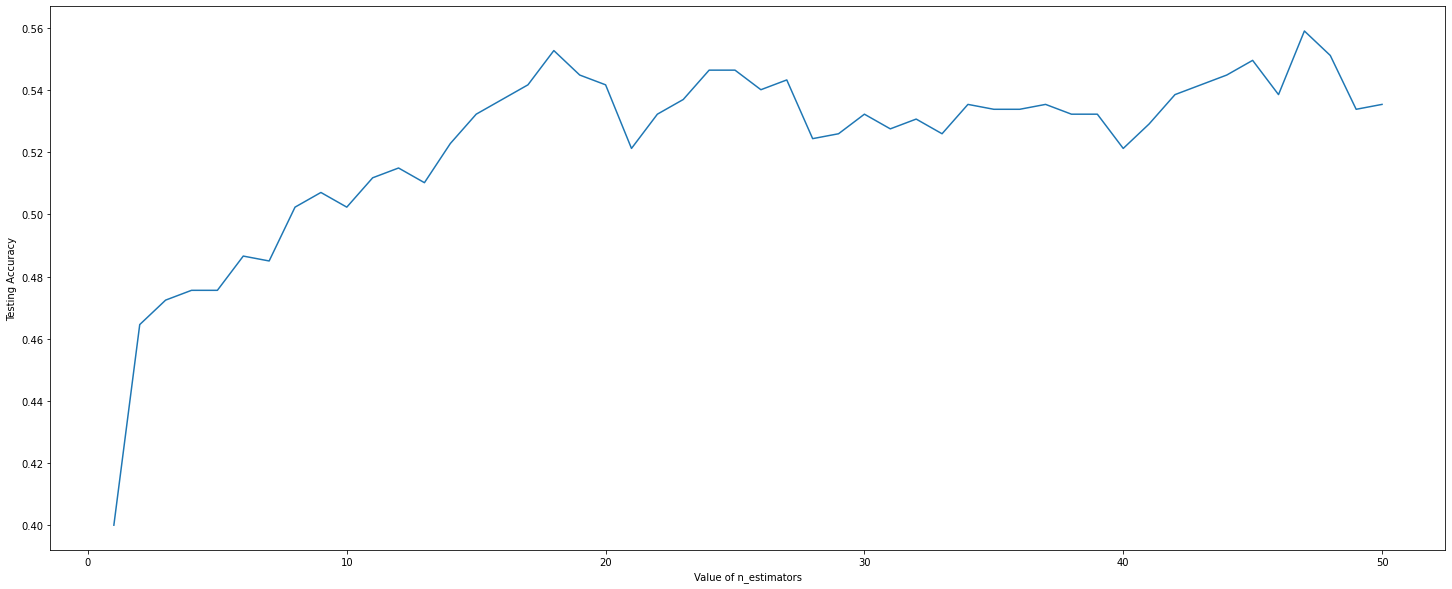

In [38]:
from sklearn.ensemble import AdaBoostClassifier
N=50
k_range = range (1,N+1)
scores={}
scores_list = []
for k in k_range:
  classifier = AdaBoostClassifier(n_estimators=k,random_state=0)
  classifier.fit(X_train, y_train)
  y_pred=classifier.predict(X_test)
  scores[k] = accuracy_score(y_test,y_pred)
  scores_list.append(accuracy_score(y_test,y_pred))
  print(str(k)+"/"+str(N)+" round completed......................... Accurecy: "+str(accuracy_score(y_test,y_pred)))



%matplotlib inline
import matplotlib.pyplot as plt
#plot the relationship between K and the testing accuracy
plt.figure(figsize = (25,10))
plt.plot(k_range,scores_list)
plt.xlabel('Value of n_estimators')
plt.ylabel ('Testing Accuracy')



print("The best n_estimators:")
best_estimator=list(scores.keys())[scores_list.index(max(scores_list))]
print(best_estimator)

In [39]:
from sklearn.ensemble import AdaBoostClassifier

ada_best_estimator = AdaBoostClassifier(n_estimators=best_estimator,random_state=0)
ada_best_estimator.fit(X_train, y_train)
y_pred = ada_best_estimator.predict(X_test)

from sklearn.metrics import classification_report, confusion_matrix, accuracy_score
print(confusion_matrix(y_test, y_pred))
print(classification_report(y_test,y_pred))
print("Accurecy: ",accuracy_score(y_test, y_pred))
result[(ada_best_estimator,1,'AdaBoostClassifier')]=accuracy_score(y_test, y_pred)

[[ 96  34  13  20]
 [ 45  74  13  13]
 [ 35  24  74  35]
 [  6  16  26 111]]
              precision    recall  f1-score   support

           0       0.53      0.59      0.56       163
           1       0.50      0.51      0.51       145
           2       0.59      0.44      0.50       168
           3       0.62      0.70      0.66       159

    accuracy                           0.56       635
   macro avg       0.56      0.56      0.56       635
weighted avg       0.56      0.56      0.56       635

Accurecy:  0.5590551181102362




---



---



#Graddient Boosting

In [ ]:
from sklearn.ensemble import GradientBoostingClassifier
from sklearn.model_selection import RepeatedStratifiedKFold

gradBoost_default = GradientBoostingClassifier(random_state=0)
gradBoost_default.fit(X_train, y_train)
y_pred = gradBoost_default.predict(X_test)

from sklearn.metrics import classification_report, confusion_matrix, accuracy_score
print(confusion_matrix(y_test, y_pred))
print(classification_report(y_test,y_pred))
print("Accurecy: ",accuracy_score(y_test, y_pred))
result[(gradBoost_default,2,'GradientBoostingClassifier')]=accuracy_score(y_test, y_pred)

[[107  23  23  10]
 [ 16 102  11  16]
 [ 21  19 109  19]
 [  5   6  20 128]]
              precision    recall  f1-score   support

           0       0.72      0.66      0.69       163
           1       0.68      0.70      0.69       145
           2       0.67      0.65      0.66       168
           3       0.74      0.81      0.77       159

    accuracy                           0.70       635
   macro avg       0.70      0.70      0.70       635
weighted avg       0.70      0.70      0.70       635

Accurecy:  0.7023622047244095


1/50 round completed......................... Accurecy: 0.5874015748031496
2/50 round completed......................... Accurecy: 0.5826771653543307
3/50 round completed......................... Accurecy: 0.5937007874015748
4/50 round completed......................... Accurecy: 0.6078740157480315
5/50 round completed......................... Accurecy: 0.6062992125984252
6/50 round completed......................... Accurecy: 0.6125984251968504
7/50 round completed......................... Accurecy: 0.6173228346456693
8/50 round completed......................... Accurecy: 0.6236220472440945
9/50 round completed......................... Accurecy: 0.6299212598425197
10/50 round completed......................... Accurecy: 0.6267716535433071
11/50 round completed......................... Accurecy: 0.631496062992126
12/50 round completed......................... Accurecy: 0.6346456692913386
13/50 round completed......................... Accurecy: 0.6456692913385826
14/50 round completed.

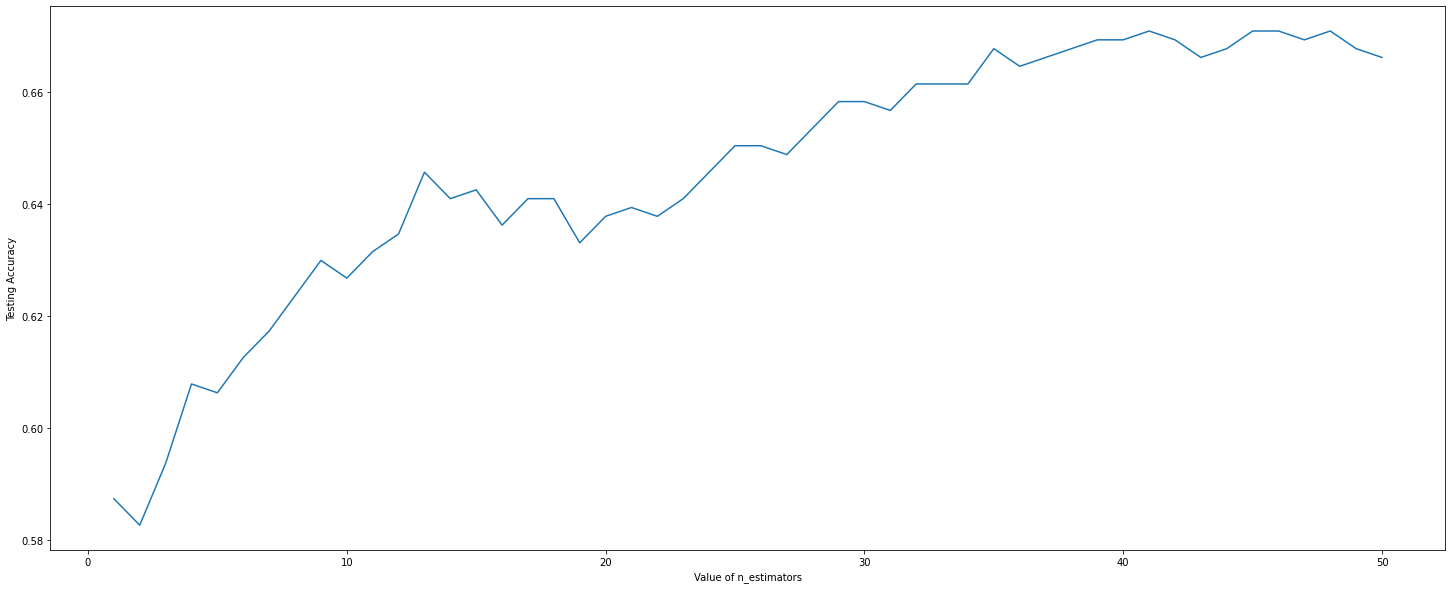

In [ ]:
from sklearn.ensemble import GradientBoostingClassifier
from sklearn.metrics import accuracy_score
N=50
k_range = range (1,N+1)
scores={}
scores_list = []
for k in k_range:
  classifier = GradientBoostingClassifier(n_estimators=k,random_state=0)
  classifier.fit(X_train, y_train)
  y_pred=classifier.predict(X_test)
  scores[k] = accuracy_score(y_test,y_pred)
  scores_list.append(accuracy_score(y_test,y_pred))
  print(str(k)+"/"+str(N)+" round completed......................... Accurecy: "+str(accuracy_score(y_test,y_pred)))



%matplotlib inline
import matplotlib.pyplot as plt

plt.figure(figsize = (25,10))
plt.plot(k_range,scores_list)
plt.xlabel('Value of n_estimators')
plt.ylabel ('Testing Accuracy')



print("The best n_estimators:")
best_estimator=list(scores.keys())[scores_list.index(max(scores_list))]
print(best_estimator)

1/14 round completed......................... Accurecy: 0.6173228346456693
2/14 round completed......................... Accurecy: 0.6645669291338583
3/14 round completed......................... Accurecy: 0.7023622047244095
4/14 round completed......................... Accurecy: 0.7559055118110236
5/14 round completed......................... Accurecy: 0.768503937007874
6/14 round completed......................... Accurecy: 0.7858267716535433
7/14 round completed......................... Accurecy: 0.7937007874015748
8/14 round completed......................... Accurecy: 0.8015748031496063
9/14 round completed......................... Accurecy: 0.8
10/14 round completed......................... Accurecy: 0.8
11/14 round completed......................... Accurecy: 0.8062992125984252
12/14 round completed......................... Accurecy: 0.7968503937007874
13/14 round completed......................... Accurecy: 0.7779527559055118
14/14 round completed......................... Accur

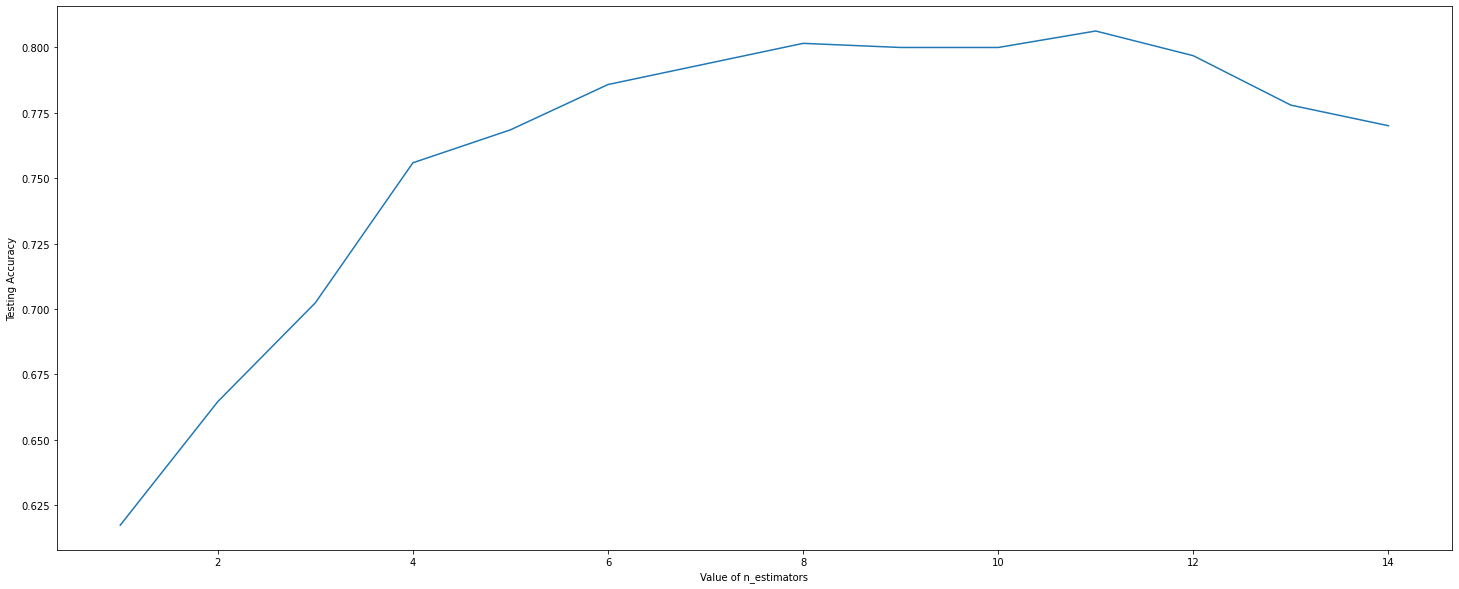

In [ ]:
from sklearn.ensemble import GradientBoostingClassifier
from sklearn.metrics import accuracy_score
N=14
k_range = range (1,N+1)
scores={}
scores_list = []
for k in k_range:
  classifier = GradientBoostingClassifier(max_depth=k,random_state=0)
  classifier.fit(X_train, y_train)
  y_pred=classifier.predict(X_test)
  scores[k] = accuracy_score(y_test,y_pred)
  scores_list.append(accuracy_score(y_test,y_pred))
  print(str(k)+"/"+str(N)+" round completed......................... Accurecy: "+str(accuracy_score(y_test,y_pred)))



%matplotlib inline
import matplotlib.pyplot as plt

plt.figure(figsize = (25,10))
plt.plot(k_range,scores_list)
plt.xlabel('Value of n_estimators')
plt.ylabel ('Testing Accuracy')



print("The best Depth:")
best_depth=list(scores.keys())[scores_list.index(max(scores_list))]
print(best_depth)

In [ ]:
from sklearn.ensemble import GradientBoostingClassifier

gradBoost_estimator = GradientBoostingClassifier(n_estimators=best_estimator,random_state=0)
gradBoost_estimator.fit(X_train, y_train)
y_pred = gradBoost_estimator.predict(X_test)

from sklearn.metrics import classification_report, confusion_matrix, accuracy_score
print(confusion_matrix(y_test, y_pred))
print(classification_report(y_test,y_pred))
print("Accurecy: ",accuracy_score(y_test, y_pred))
result[(gradBoost_estimator,2,'GradientBoostingClassifier')]=accuracy_score(y_test, y_pred)

[[106  21  23  13]
 [ 20  94   9  22]
 [ 18  22 109  19]
 [  5  10  27 117]]
              precision    recall  f1-score   support

           0       0.71      0.65      0.68       163
           1       0.64      0.65      0.64       145
           2       0.65      0.65      0.65       168
           3       0.68      0.74      0.71       159

    accuracy                           0.67       635
   macro avg       0.67      0.67      0.67       635
weighted avg       0.67      0.67      0.67       635

Accurecy:  0.6708661417322834


In [ ]:
from sklearn.ensemble import GradientBoostingClassifier

gradBoost_depth = GradientBoostingClassifier(max_depth=best_depth,random_state=0)
gradBoost_depth.fit(X_train, y_train)
y_pred = gradBoost_depth.predict(X_test)

from sklearn.metrics import classification_report, confusion_matrix, accuracy_score
print(confusion_matrix(y_test, y_pred))
print(classification_report(y_test,y_pred))
print("Accurecy: ",accuracy_score(y_test, y_pred))

result[(gradBoost_depth,2,'GradientBoostingClassifier')]=accuracy_score(y_test, y_pred)

[[122  18  17   6]
 [ 11 126   3   5]
 [ 17  19 119  13]
 [  2   3   9 145]]
              precision    recall  f1-score   support

           0       0.80      0.75      0.77       163
           1       0.76      0.87      0.81       145
           2       0.80      0.71      0.75       168
           3       0.86      0.91      0.88       159

    accuracy                           0.81       635
   macro avg       0.81      0.81      0.81       635
weighted avg       0.81      0.81      0.80       635

Accurecy:  0.8062992125984252


In [ ]:
from sklearn.ensemble import GradientBoostingClassifier

gradBoost_all = GradientBoostingClassifier(n_estimators=best_estimator,max_depth=best_depth,random_state=0)
gradBoost_all.fit(X_train, y_train)
y_pred = gradBoost_all.predict(X_test)

from sklearn.metrics import classification_report, confusion_matrix, accuracy_score
print(confusion_matrix(y_test, y_pred))
print(classification_report(y_test,y_pred))
print("Accurecy: ",accuracy_score(y_test, y_pred))

result[(gradBoost_all,2,'GradientBoostingClassifier')]=accuracy_score(y_test, y_pred)

[[120  19  17   7]
 [ 13 123   3   6]
 [ 17  20 114  17]
 [  3   3  12 141]]
              precision    recall  f1-score   support

           0       0.78      0.74      0.76       163
           1       0.75      0.85      0.79       145
           2       0.78      0.68      0.73       168
           3       0.82      0.89      0.85       159

    accuracy                           0.78       635
   macro avg       0.78      0.79      0.78       635
weighted avg       0.78      0.78      0.78       635

Accurecy:  0.784251968503937




---



---



#Random Forest

In [ ]:
from sklearn.ensemble import RandomForestClassifier
rf_default = RandomForestClassifier(random_state=0)
rf_default.fit(X_train, y_train)
y_pred=rf_default.predict(X_test)


from sklearn.metrics import classification_report, confusion_matrix, accuracy_score
print(confusion_matrix(y_test, y_pred))
print(classification_report(y_test,y_pred))
print("Accurecy: ",accuracy_score(y_test, y_pred))
result[(rf_default,3,'RandomForestClassifier')]=accuracy_score(y_test, y_pred)

[[120  16  20   7]
 [  9 124   6   6]
 [ 17  17 121  13]
 [  4   3  10 142]]
              precision    recall  f1-score   support

           0       0.80      0.74      0.77       163
           1       0.78      0.86      0.81       145
           2       0.77      0.72      0.74       168
           3       0.85      0.89      0.87       159

    accuracy                           0.80       635
   macro avg       0.80      0.80      0.80       635
weighted avg       0.80      0.80      0.80       635

Accurecy:  0.7984251968503937


1/150 round completed......................... Accurecy: 0.5763779527559055
2/150 round completed......................... Accurecy: 0.6047244094488189
3/150 round completed......................... Accurecy: 0.6803149606299213
4/150 round completed......................... Accurecy: 0.6803149606299213
5/150 round completed......................... Accurecy: 0.7070866141732284
6/150 round completed......................... Accurecy: 0.7181102362204724
7/150 round completed......................... Accurecy: 0.7228346456692913
8/150 round completed......................... Accurecy: 0.7354330708661417
9/150 round completed......................... Accurecy: 0.7559055118110236
10/150 round completed......................... Accurecy: 0.7385826771653543
11/150 round completed......................... Accurecy: 0.752755905511811
12/150 round completed......................... Accurecy: 0.75748031496063
13/150 round completed......................... Accurecy: 0.7543307086614173
14/150 roun

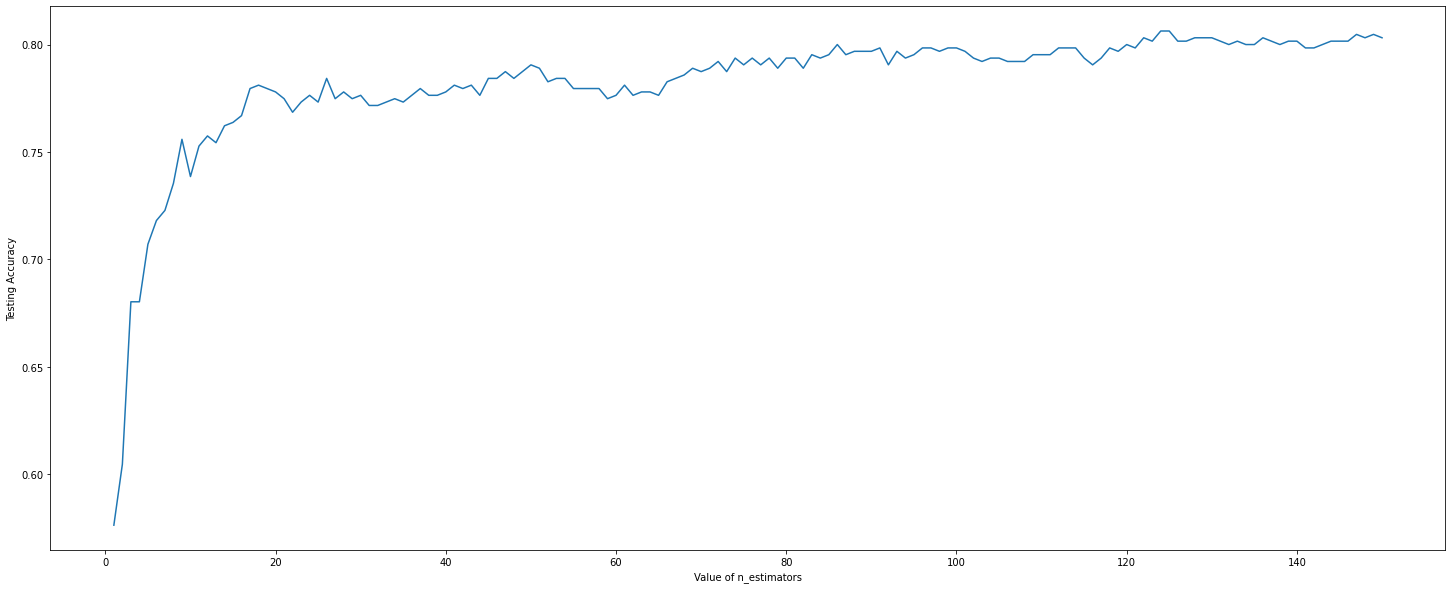

In [ ]:
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import accuracy_score
N=150
k_range = range (1,N+1)
scores={}
scores_list = []
for k in k_range:
  classifier = RandomForestClassifier(n_estimators=k,random_state=0)
  classifier.fit(X_train, y_train)
  y_pred=classifier.predict(X_test)
  scores[k] = accuracy_score(y_test,y_pred)
  scores_list.append(accuracy_score(y_test,y_pred))
  print(str(k)+"/"+str(N)+" round completed......................... Accurecy: "+str(accuracy_score(y_test,y_pred)))



%matplotlib inline
import matplotlib.pyplot as plt

plt.figure(figsize = (25,10))
plt.plot(k_range,scores_list)
plt.xlabel('Value of n_estimators')
plt.ylabel ('Testing Accuracy')



print("The best n_estimators:")
best_estimator=list(scores.keys())[scores_list.index(max(scores_list))]
print(best_estimator)

1/30 round completed......................... Accurecy: 0.431496062992126
2/30 round completed......................... Accurecy: 0.5496062992125984
3/30 round completed......................... Accurecy: 0.5653543307086614
4/30 round completed......................... Accurecy: 0.5889763779527559
5/30 round completed......................... Accurecy: 0.6204724409448819
6/30 round completed......................... Accurecy: 0.6488188976377953
7/30 round completed......................... Accurecy: 0.6803149606299213
8/30 round completed......................... Accurecy: 0.6960629921259842
9/30 round completed......................... Accurecy: 0.7275590551181103
10/30 round completed......................... Accurecy: 0.7354330708661417
11/30 round completed......................... Accurecy: 0.75748031496063
12/30 round completed......................... Accurecy: 0.7590551181102362
13/30 round completed......................... Accurecy: 0.7732283464566929
14/30 round completed...

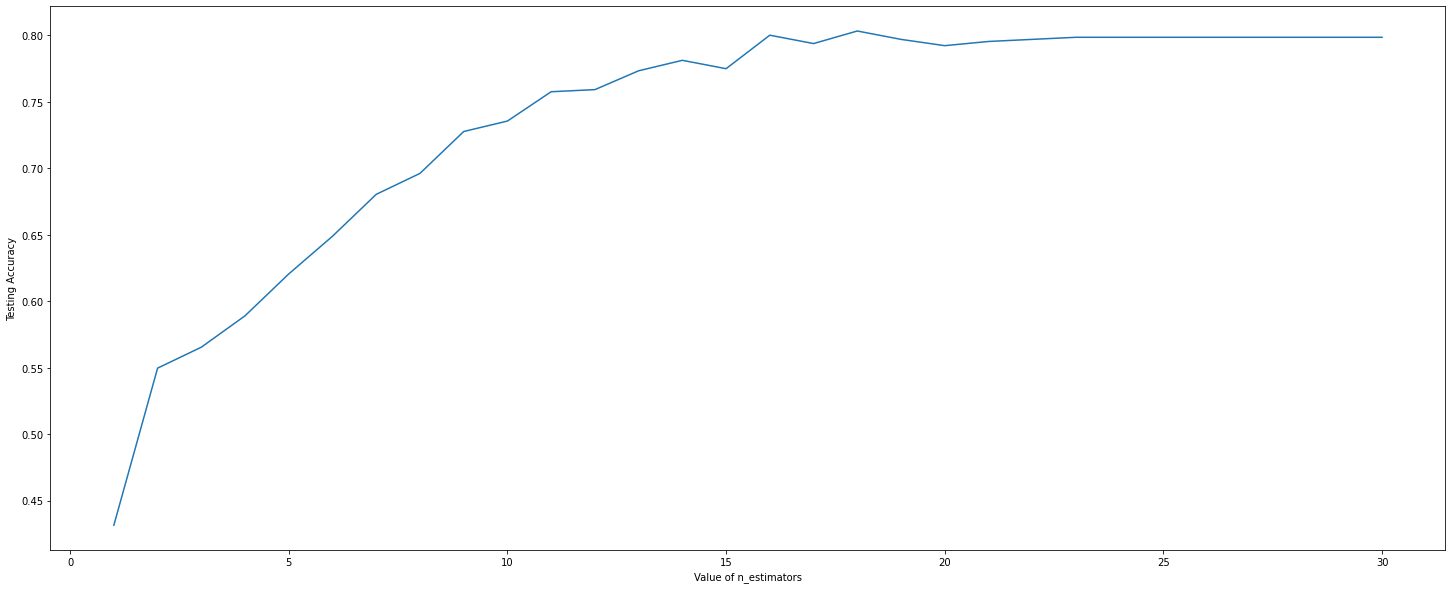

In [ ]:
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import accuracy_score
N=30
k_range = range (1,N+1)
scores={}
scores_list = []
for k in k_range:
  classifier = RandomForestClassifier(max_depth=k,random_state=0)
  classifier.fit(X_train, y_train)
  y_pred=classifier.predict(X_test)
  scores[k] = accuracy_score(y_test,y_pred)
  scores_list.append(accuracy_score(y_test,y_pred))
  print(str(k)+"/"+str(N)+" round completed......................... Accurecy: "+str(accuracy_score(y_test,y_pred)))



%matplotlib inline
import matplotlib.pyplot as plt

plt.figure(figsize = (25,10))
plt.plot(k_range,scores_list)
plt.xlabel('Value of n_estimators')
plt.ylabel ('Testing Accuracy')



print("The best Depth:")
best_depth=list(scores.keys())[scores_list.index(max(scores_list))]
print(best_depth)

In [ ]:
from sklearn.ensemble import RandomForestClassifier
rf_estimator = RandomForestClassifier(n_estimators=best_estimator,random_state=0)
rf_estimator.fit(X_train, y_train)
y_pred=rf_estimator.predict(X_test)


from sklearn.metrics import classification_report, confusion_matrix, accuracy_score
print(confusion_matrix(y_test, y_pred))
print(classification_report(y_test,y_pred))
print("Accurecy: ",accuracy_score(y_test, y_pred))
result[(rf_estimator,3,'RandomForestClassifier')]=accuracy_score(y_test, y_pred)

[[120  17  19   7]
 [  8 129   4   4]
 [ 17  17 121  13]
 [  4   3  10 142]]
              precision    recall  f1-score   support

           0       0.81      0.74      0.77       163
           1       0.78      0.89      0.83       145
           2       0.79      0.72      0.75       168
           3       0.86      0.89      0.87       159

    accuracy                           0.81       635
   macro avg       0.81      0.81      0.81       635
weighted avg       0.81      0.81      0.80       635

Accurecy:  0.8062992125984252


In [ ]:
from sklearn.ensemble import RandomForestClassifier
rf_depth = RandomForestClassifier(max_depth=best_depth,random_state=0)
rf_depth.fit(X_train, y_train)
y_pred=rf_depth.predict(X_test)


from sklearn.metrics import classification_report, confusion_matrix, accuracy_score
print(confusion_matrix(y_test, y_pred))
print(classification_report(y_test,y_pred))
print("Accurecy: ",accuracy_score(y_test, y_pred))
result[(rf_depth,3,'RandomForestClassifier')]=accuracy_score(y_test, y_pred)

[[118  17  19   9]
 [  7 129   5   4]
 [ 20  15 119  14]
 [  4   3   8 144]]
              precision    recall  f1-score   support

           0       0.79      0.72      0.76       163
           1       0.79      0.89      0.83       145
           2       0.79      0.71      0.75       168
           3       0.84      0.91      0.87       159

    accuracy                           0.80       635
   macro avg       0.80      0.81      0.80       635
weighted avg       0.80      0.80      0.80       635

Accurecy:  0.8031496062992126


In [ ]:
from sklearn.ensemble import RandomForestClassifier
rf_all = RandomForestClassifier(n_estimators=best_estimator,max_depth=best_depth,random_state=0)
rf_all.fit(X_train, y_train)
y_pred=rf_all.predict(X_test)


from sklearn.metrics import classification_report, confusion_matrix, accuracy_score
print(confusion_matrix(y_test, y_pred))
print(classification_report(y_test,y_pred))
print("Accurecy: ",accuracy_score(y_test, y_pred))
result[(rf_all,3,'RandomForestClassifier')]=accuracy_score(y_test, y_pred)

[[118  18  19   8]
 [  7 129   5   4]
 [ 18  15 121  14]
 [  4   3  11 141]]
              precision    recall  f1-score   support

           0       0.80      0.72      0.76       163
           1       0.78      0.89      0.83       145
           2       0.78      0.72      0.75       168
           3       0.84      0.89      0.87       159

    accuracy                           0.80       635
   macro avg       0.80      0.81      0.80       635
weighted avg       0.80      0.80      0.80       635

Accurecy:  0.8015748031496063




---



---



#XGB

In [48]:


import xgboost as xgb
xgb_deafult = xgb.XGBClassifier(random_state=0)
xgb_deafult.fit(X_train.values,y_train.values)
y_pred = xgb_deafult.predict(X_test.values)


from sklearn.metrics import classification_report, confusion_matrix, accuracy_score
print(confusion_matrix(y_test, y_pred))
print(classification_report(y_test,y_pred))
print("Accurecy: ",accuracy_score(y_test, y_pred))
result[(xgb_deafult,4,'xgboost')]=accuracy_score(y_test, y_pred)

[[107  27  18  11]
 [ 20 108   8   9]
 [ 23  22  99  24]
 [  7   6  24 122]]
              precision    recall  f1-score   support

           0       0.68      0.66      0.67       163
           1       0.66      0.74      0.70       145
           2       0.66      0.59      0.62       168
           3       0.73      0.77      0.75       159

    accuracy                           0.69       635
   macro avg       0.69      0.69      0.69       635
weighted avg       0.69      0.69      0.69       635

Accurecy:  0.6866141732283465


In [ ]:
import xgboost as xgb
from sklearn.metrics import accuracy_score
N=250
k_range = range (1,N+1)
scores={}
scores_list = []
for k in k_range:
  xgb_classifier = xgb.XGBClassifier(n_estimators=k,random_state=0)
  xgb_classifier.fit(X_train.values, y_train.values)
  y_pred=xgb_classifier.predict(X_test.values)
  scores[k] = accuracy_score(y_test,y_pred)
  scores_list.append(accuracy_score(y_test,y_pred))
  print(str(k)+"/"+str(N)+" round completed......................... Accurecy: "+str(accuracy_score(y_test,y_pred)))


%matplotlib inline
import matplotlib.pyplot as plt

plt.figure(figsize = (25,10))
plt.plot(k_range,scores_list)
plt.xlabel('Value of n_estimators')
plt.ylabel ('Testing Accuracy')



print("The best n_estimators:")
best_estimator=list(scores.keys())[scores_list.index(max(scores_list))]
print(best_estimator)

1/250 round completed......................... Accurecy: 0.5559055118110237
2/250 round completed......................... Accurecy: 0.5874015748031496
3/250 round completed......................... Accurecy: 0.5716535433070866
4/250 round completed......................... Accurecy: 0.5779527559055118
5/250 round completed......................... Accurecy: 0.5795275590551181
6/250 round completed......................... Accurecy: 0.5905511811023622
7/250 round completed......................... Accurecy: 0.5921259842519685
8/250 round completed......................... Accurecy: 0.6047244094488189
9/250 round completed......................... Accurecy: 0.6047244094488189
10/250 round completed......................... Accurecy: 0.6
11/250 round completed......................... Accurecy: 0.6125984251968504
12/250 round completed......................... Accurecy: 0.6125984251968504
13/250 round completed......................... Accurecy: 0.6141732283464567
14/250 round completed.

1/30 round completed......................... Accurecy: 0.5606299212598426
2/30 round completed......................... Accurecy: 0.6409448818897637
3/30 round completed......................... Accurecy: 0.6866141732283465
4/30 round completed......................... Accurecy: 0.7181102362204724
5/30 round completed......................... Accurecy: 0.752755905511811
6/30 round completed......................... Accurecy: 0.7559055118110236
7/30 round completed......................... Accurecy: 0.7606299212598425
8/30 round completed......................... Accurecy: 0.7669291338582677
9/30 round completed......................... Accurecy: 0.7732283464566929
10/30 round completed......................... Accurecy: 0.768503937007874
11/30 round completed......................... Accurecy: 0.7811023622047244
12/30 round completed......................... Accurecy: 0.7779527559055118
13/30 round completed......................... Accurecy: 0.7826771653543307
14/30 round completed..

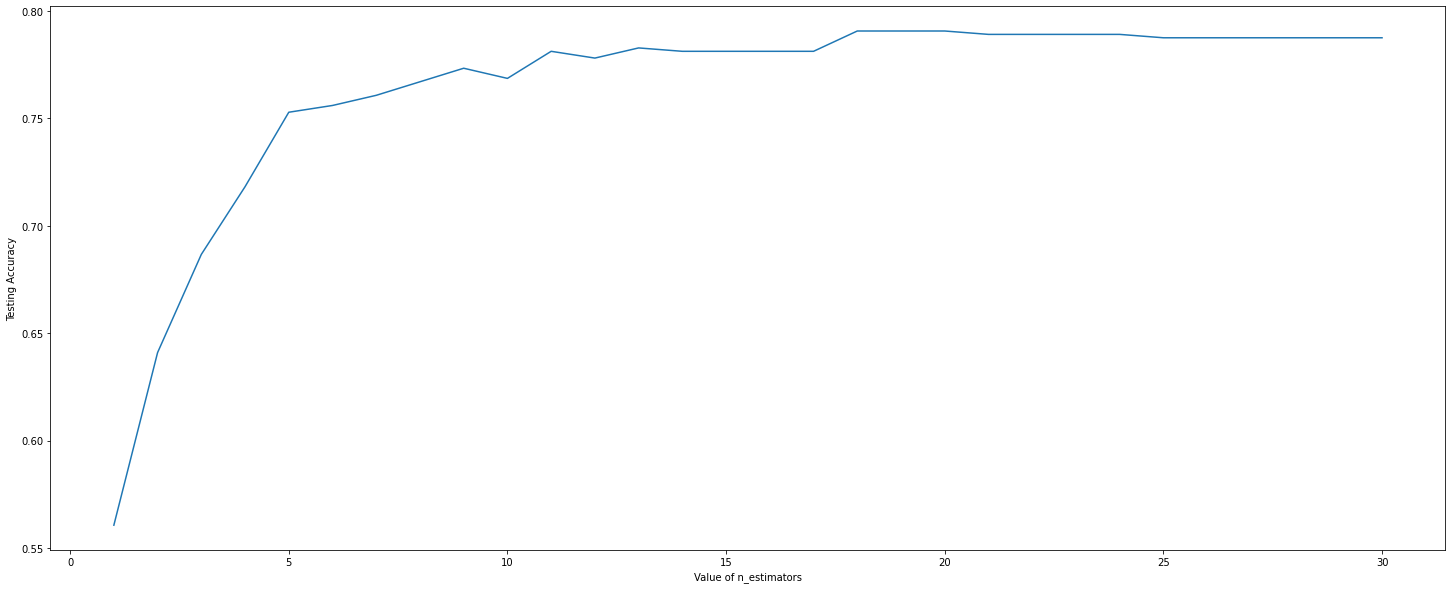

In [33]:
import xgboost as xgb
from sklearn.metrics import accuracy_score
N=30
k_range = range (1,N+1)
scores={}
scores_list = []
for k in k_range:
  xgb_classifier = xgb.XGBClassifier(max_depth=k,random_state=0)
  xgb_classifier.fit(X_train.values, y_train.values)
  y_pred=xgb_classifier.predict(X_test.values)
  scores[k] = accuracy_score(y_test,y_pred)
  scores_list.append(accuracy_score(y_test,y_pred))
  print(str(k)+"/"+str(N)+" round completed......................... Accurecy: "+str(accuracy_score(y_test,y_pred)))


%matplotlib inline
import matplotlib.pyplot as plt

plt.figure(figsize = (25,10))
plt.plot(k_range,scores_list)
plt.xlabel('Value of n_estimators')
plt.ylabel ('Testing Accuracy')



print("The best depth:")
best_depth=list(scores.keys())[scores_list.index(max(scores_list))]
print(best_depth)

In [34]:
import xgboost as xgb
xgb_depth = xgb.XGBClassifier(max_depth=best_depth,random_state=0)
xgb_depth.fit(X_train.values,y_train.values)
y_pred = xgb_depth.predict(X_test.values)


from sklearn.metrics import classification_report, confusion_matrix, accuracy_score
print(confusion_matrix(y_test, y_pred))
print(classification_report(y_test,y_pred))
print("Accurecy: ",accuracy_score(y_test, y_pred))
result[(xgb_depth,4,'xgboost')]=accuracy_score(y_test, y_pred)
print(xgb_depth)

[[120  19  21   3]
 [ 14 119   6   6]
 [ 13   6 128  21]
 [  6   3  15 135]]
              precision    recall  f1-score   support

           0       0.78      0.74      0.76       163
           1       0.81      0.82      0.82       145
           2       0.75      0.76      0.76       168
           3       0.82      0.85      0.83       159

    accuracy                           0.79       635
   macro avg       0.79      0.79      0.79       635
weighted avg       0.79      0.79      0.79       635

Accurecy:  0.7905511811023622
XGBClassifier(max_depth=18, objective='multi:softprob')


In [35]:
import xgboost as xgb
xgb_estimator = xgb.XGBClassifier(n_estimators=best_estimator,random_state=0)
xgb_estimator.fit(X_train.values,y_train.values)
y_pred = xgb_estimator.predict(X_test.values)


from sklearn.metrics import classification_report, confusion_matrix, accuracy_score
print(confusion_matrix(y_test, y_pred))
print(classification_report(y_test,y_pred))
print("Accurecy: ",accuracy_score(y_test, y_pred))
result[(xgb_estimator,4,'xgboost')]=accuracy_score(y_test, y_pred)
print(xgb_estimator)

[[111  22  21   9]
 [ 22 107  10   6]
 [ 17  18 112  21]
 [  6   5  20 128]]
              precision    recall  f1-score   support

           0       0.71      0.68      0.70       163
           1       0.70      0.74      0.72       145
           2       0.69      0.67      0.68       168
           3       0.78      0.81      0.79       159

    accuracy                           0.72       635
   macro avg       0.72      0.72      0.72       635
weighted avg       0.72      0.72      0.72       635

Accurecy:  0.721259842519685
XGBClassifier(n_estimators=250, objective='multi:softprob')


In [36]:
import xgboost as xgb
xgb_all = xgb.XGBClassifier(n_estimators=best_estimator,max_depth=best_depth,random_state=0)
xgb_all.fit(X_train.values,y_train.values)
y_pred = xgb_all.predict(X_test.values)


from sklearn.metrics import classification_report, confusion_matrix, accuracy_score
print(confusion_matrix(y_test, y_pred))
print(classification_report(y_test,y_pred))
print("Accurecy: ",accuracy_score(y_test, y_pred))
result[(xgb_all,4,'xgboost')]=accuracy_score(y_test, y_pred)

[[122  17  19   5]
 [ 13 122   8   2]
 [ 12   7 126  23]
 [  5   4  15 135]]
              precision    recall  f1-score   support

           0       0.80      0.75      0.77       163
           1       0.81      0.84      0.83       145
           2       0.75      0.75      0.75       168
           3       0.82      0.85      0.83       159

    accuracy                           0.80       635
   macro avg       0.80      0.80      0.80       635
weighted avg       0.80      0.80      0.79       635

Accurecy:  0.7952755905511811


#KNN

In [ ]:
from sklearn.neighbors import KNeighborsClassifier
knn_default = KNeighborsClassifier()
knn_default.fit(X_train, y_train)
y_pred=knn_default.predict(X_test)


from sklearn.metrics import classification_report, confusion_matrix, accuracy_score
print(confusion_matrix(y_test, y_pred))
print(classification_report(y_test,y_pred))
print("Accurecy: ",accuracy_score(y_test, y_pred))
result[(knn_default,5,'KNeighborsClassifier')]=accuracy_score(y_test, y_pred)

[[ 89  41  19  14]
 [ 17 116   2  10]
 [ 26  29  92  21]
 [  9   6  18 126]]
              precision    recall  f1-score   support

           0       0.63      0.55      0.59       163
           1       0.60      0.80      0.69       145
           2       0.70      0.55      0.62       168
           3       0.74      0.79      0.76       159

    accuracy                           0.67       635
   macro avg       0.67      0.67      0.66       635
weighted avg       0.67      0.67      0.66       635

Accurecy:  0.6661417322834645


1/105 round completed......................... Accurecy: 0.7921259842519685
2/105 round completed......................... Accurecy: 0.7039370078740157
3/105 round completed......................... Accurecy: 0.7165354330708661
4/105 round completed......................... Accurecy: 0.6850393700787402
5/105 round completed......................... Accurecy: 0.6661417322834645
6/105 round completed......................... Accurecy: 0.6503937007874016
7/105 round completed......................... Accurecy: 0.6377952755905512
8/105 round completed......................... Accurecy: 0.6440944881889764
9/105 round completed......................... Accurecy: 0.6299212598425197
10/105 round completed......................... Accurecy: 0.6173228346456693
11/105 round completed......................... Accurecy: 0.6377952755905512
12/105 round completed......................... Accurecy: 0.6299212598425197
13/105 round completed......................... Accurecy: 0.6267716535433071
14/105 r

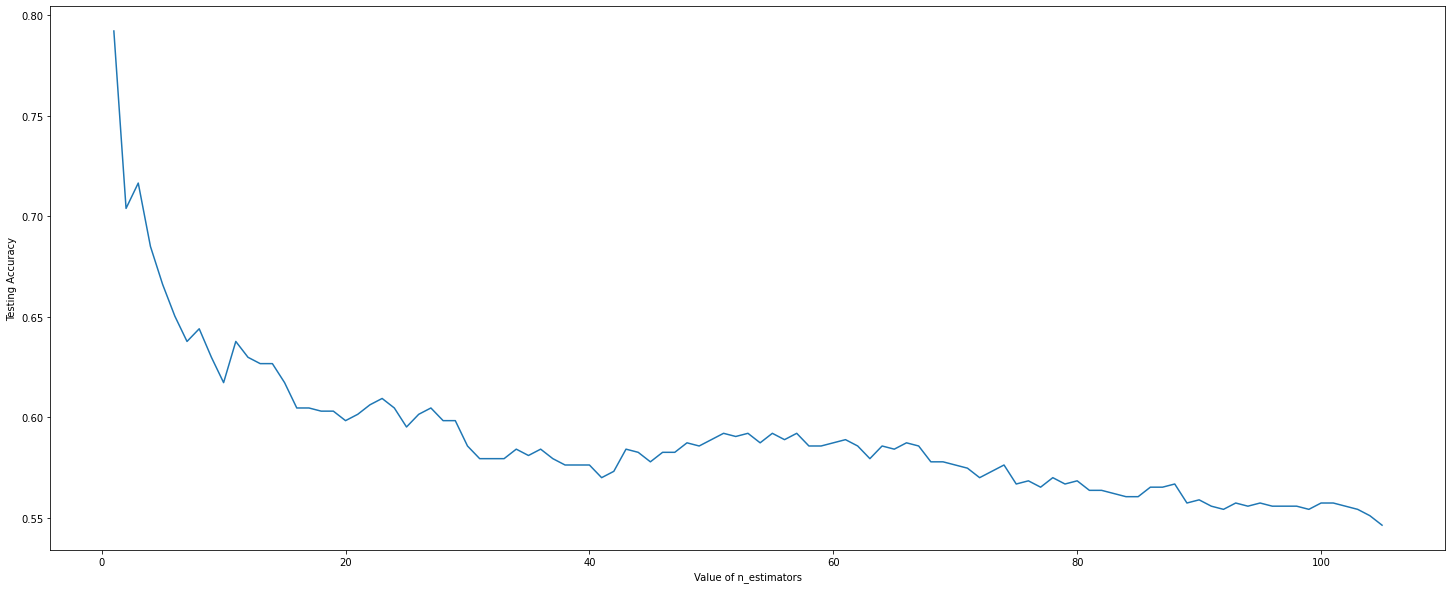

In [ ]:
from sklearn.neighbors import KNeighborsClassifier
from sklearn.metrics import accuracy_score
Neighbors=105
k_range = range (1,Neighbors+1)
scores={}
scores_list = []
for k in k_range:
  knn = KNeighborsClassifier(n_neighbors=k)
  knn.fit(X_train, y_train)
  y_pred=knn.predict(X_test)
  scores[k] = accuracy_score(y_test,y_pred)
  scores_list.append(accuracy_score(y_test,y_pred))
  print(str(k)+"/"+str(Neighbors)+" round completed......................... Accurecy: "+str(accuracy_score(y_test,y_pred)))


%matplotlib inline
import matplotlib.pyplot as plt

plt.figure(figsize = (25,10))
plt.plot(k_range,scores_list)
plt.xlabel('Value of n_estimators')
plt.ylabel ('Testing Accuracy')



print("The best Depth:")
best=list(scores.keys())[scores_list.index(max(scores_list))]
print(best)

In [ ]:
from sklearn.neighbors import KNeighborsClassifier
knn_neighbors = KNeighborsClassifier(n_neighbors=best)
knn_neighbors.fit(X_train, y_train)
y_pred=knn_neighbors.predict(X_test)


from sklearn.metrics import classification_report, confusion_matrix, accuracy_score
print(confusion_matrix(y_test, y_pred))
print(classification_report(y_test,y_pred))
print("Accurecy: ",accuracy_score(y_test, y_pred))
result[(knn_neighbors,5,'KNeighborsClassifier')]=accuracy_score(y_test, y_pred)

[[ 95  26  29  13]
 [  3 139   0   3]
 [ 17   9 125  17]
 [  6   1   8 144]]
              precision    recall  f1-score   support

           0       0.79      0.58      0.67       163
           1       0.79      0.96      0.87       145
           2       0.77      0.74      0.76       168
           3       0.81      0.91      0.86       159

    accuracy                           0.79       635
   macro avg       0.79      0.80      0.79       635
weighted avg       0.79      0.79      0.79       635

Accurecy:  0.7921259842519685


#NB

In [ ]:
from sklearn.naive_bayes import GaussianNB

nb_deafult = GaussianNB()
nb_deafult.fit(X_train, y_train)
y_pred = nb_deafult.predict(X_test)


from sklearn.metrics import classification_report, confusion_matrix, accuracy_score
print(confusion_matrix(y_test, y_pred))
print(classification_report(y_test,y_pred))
print("Accurecy: ",accuracy_score(y_test, y_pred))
result[(nb_deafult,6,'GaussianNB')]=accuracy_score(y_test, y_pred)

[[110  42   8   3]
 [ 54  81   6   4]
 [ 49  47  68   4]
 [ 52  71  19  17]]
              precision    recall  f1-score   support

           0       0.42      0.67      0.51       163
           1       0.34      0.56      0.42       145
           2       0.67      0.40      0.51       168
           3       0.61      0.11      0.18       159

    accuracy                           0.43       635
   macro avg       0.51      0.44      0.41       635
weighted avg       0.51      0.43      0.41       635

Accurecy:  0.4346456692913386




---



---



#Result

In [ ]:

models=[]

for i in result:
  models.append(i[0])
  print(i[0],i[1]," : ",result[i])
  print("---------------------------------------------------------------")
  print()


AdaBoostClassifier(random_state=0) 1  :  0.5606299212598426
---------------------------------------------------------------

AdaBoostClassifier(n_estimators=39, random_state=0) 1  :  0.5716535433070866
---------------------------------------------------------------

GradientBoostingClassifier(random_state=0) 2  :  0.7023622047244095
---------------------------------------------------------------

GradientBoostingClassifier(n_estimators=41, random_state=0) 2  :  0.6708661417322834
---------------------------------------------------------------

GradientBoostingClassifier(max_depth=11, random_state=0) 2  :  0.8062992125984252
---------------------------------------------------------------

GradientBoostingClassifier(max_depth=11, n_estimators=41, random_state=0) 2  :  0.784251968503937
---------------------------------------------------------------

RandomForestClassifier(random_state=0) 3  :  0.7984251968503937
---------------------------------------------------------------

RandomFores

In [ ]:
sorted_list=[]
sorted_list = sorted(result, key=result.get,reverse=True)

for i in sorted_list:
  print(i,"  : ",result[i])
  print("-------------------------------------------------------------------------------------------------")

print(sorted_list)


flage=[]
best_models=[]
it=0

for i in sorted_list:
  if it==4:
    break

  if i[1] not in flage:
    best_models.append((i[0],i[2]))
    flage.append(i[1])
    it+=1


(XGBClassifier(max_depth=15, n_estimators=233, objective='multi:softprob'), 4, 'xgboost')   :  0.8141732283464567
-------------------------------------------------------------------------------------------------
(XGBClassifier(max_depth=15, objective='multi:softprob'), 4, 'xgboost')   :  0.8094488188976378
-------------------------------------------------------------------------------------------------
(GradientBoostingClassifier(max_depth=11, random_state=0), 2, 'GradientBoostingClassifier')   :  0.8062992125984252
-------------------------------------------------------------------------------------------------
(RandomForestClassifier(n_estimators=124, random_state=0), 3, 'RandomForestClassifier')   :  0.8062992125984252
-------------------------------------------------------------------------------------------------
(RandomForestClassifier(max_depth=18, random_state=0), 3, 'RandomForestClassifier')   :  0.8031496062992126
--------------------------------------------------------------

In [ ]:
print("best_models:")
for i in best_models:
  print(i)


best_models:
(XGBClassifier(max_depth=15, n_estimators=233, objective='multi:softprob'), 'xgboost')
(GradientBoostingClassifier(max_depth=11, random_state=0), 'GradientBoostingClassifier')
(RandomForestClassifier(n_estimators=124, random_state=0), 'RandomForestClassifier')
(KNeighborsClassifier(n_neighbors=1), 'KNeighborsClassifier')


In [ ]:
len(best_models)

4

#Testing Accuracy For Best 4 Models

In [ ]:

for i in best_models:
  print("--------------------------------------------------")
  print(i[0])
  y_pred=i[0].predict(X_test)
  print(confusion_matrix(y_test, y_pred))
  print(classification_report(y_test,y_pred))
  print("Accurecy: ",accuracy_score(y_test, y_pred))

--------------------------------------------------
XGBClassifier(max_depth=15, n_estimators=233, objective='multi:softprob')
[[630   0   0   0]
 [  0 648   0   0]
 [  0   0 625   0]
 [  0   0   0 634]]
              precision    recall  f1-score   support

           0       1.00      1.00      1.00       630
           1       1.00      1.00      1.00       648
           2       1.00      1.00      1.00       625
           3       1.00      1.00      1.00       634

    accuracy                           1.00      2537
   macro avg       1.00      1.00      1.00      2537
weighted avg       1.00      1.00      1.00      2537

Accurecy:  1.0
--------------------------------------------------
GradientBoostingClassifier(max_depth=11, random_state=0)
[[630   0   0   0]
 [  0 648   0   0]
 [  0   0 625   0]
 [  0   0   0 634]]
              precision    recall  f1-score   support

           0       1.00      1.00      1.00       630
           1       1.00      1.00      1.00       648


#SHAP

In [ ]:
!pip install shap
import shap

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
     |████████████████████████████████| 575 kB 8.2 MB/s 


In [ ]:

def SHAP_EXP(model,graph_feat):
  print("Models: ",model)

  explainer = shap.Explainer(model.predict, X_test)

  shap_values1 = explainer(X_test)
  features_names=list_of_feat

  if 'Subjects' in features_names:
    features_names.pop(0)


  shap.plots.bar(shap_values1,max_display=graph_feat["max_display"])

  print("---------------------")

  shap.summary_plot(shap_values1,max_display=graph_feat["max_display"],feature_names=features_names)

  print("---------------------")

  print("Local Explaination")
  shap.plots.waterfall(shap_values1[graph_feat["shap_values Index"]],max_display=graph_feat["max_display"])


  print("---------------------")

  shap.plots.bar(shap_values1[graph_feat["shap_values Index"]],max_display=graph_feat["max_display"])

In [ ]:
new_keys_7=models_check_box(models)

Checkbox(value=False, description='AdaBoostClassifier(random_state=0)', indent=False)

Checkbox(value=False, description='AdaBoostClassifier(n_estimators=39, random_state=0)', indent=False)

Checkbox(value=False, description='GradientBoostingClassifier(random_state=0)', indent=False)

Checkbox(value=False, description='GradientBoostingClassifier(n_estimators=41, random_state=0)', indent=False)

Checkbox(value=False, description='GradientBoostingClassifier(max_depth=11, random_state=0)', indent=False)

Checkbox(value=False, description='GradientBoostingClassifier(max_depth=11, n_estimators=41, random_state=0)',…

Checkbox(value=False, description='RandomForestClassifier(random_state=0)', indent=False)

Checkbox(value=False, description='RandomForestClassifier(n_estimators=124, random_state=0)', indent=False)

Checkbox(value=False, description='RandomForestClassifier(max_depth=18, random_state=0)', indent=False)

Checkbox(value=False, description='RandomForestClassifier(max_depth=18, n_estimators=124, random_state=0)', in…

Checkbox(value=False, description="XGBClassifier(objective='multi:softprob')", indent=False)

Checkbox(value=False, description="XGBClassifier(max_depth=15, objective='multi:softprob')", indent=False)

Checkbox(value=False, description="XGBClassifier(n_estimators=233, objective='multi:softprob')", indent=False)

Checkbox(value=False, description="XGBClassifier(max_depth=15, n_estimators=233, objective='multi:softprob')",…

Checkbox(value=False, description='KNeighborsClassifier()', indent=False)

Checkbox(value=False, description='KNeighborsClassifier(n_neighbors=1)', indent=False)

Checkbox(value=False, description='GaussianNB()', indent=False)

In [ ]:
graph_feat={
    "max_display":20,
    "shap_values Index":2
}

for i in range(len(new_keys_7)):
  if new_keys_7[i].value ==True:
    SHAP_EXP(models[i],graph_feat)
    print("---------------------------------------------------------")
    print("---------------------------------------------------------")
    print("---------------------------------------------------------")
    print("---------------------------------------------------------")

#Confusion Matrix For Testing

In [ ]:
new_keys_6=models_check_box(models)

Checkbox(value=False, description='AdaBoostClassifier(random_state=0)', indent=False)

Checkbox(value=False, description='AdaBoostClassifier(n_estimators=39, random_state=0)', indent=False)

Checkbox(value=False, description='GradientBoostingClassifier(random_state=0)', indent=False)

Checkbox(value=False, description='GradientBoostingClassifier(n_estimators=41, random_state=0)', indent=False)

Checkbox(value=False, description='GradientBoostingClassifier(max_depth=11, random_state=0)', indent=False)

Checkbox(value=False, description='GradientBoostingClassifier(max_depth=11, n_estimators=41, random_state=0)',…

Checkbox(value=False, description='RandomForestClassifier(random_state=0)', indent=False)

Checkbox(value=False, description='RandomForestClassifier(n_estimators=124, random_state=0)', indent=False)

Checkbox(value=False, description='RandomForestClassifier(max_depth=18, random_state=0)', indent=False)

Checkbox(value=False, description='RandomForestClassifier(max_depth=18, n_estimators=124, random_state=0)', in…

Checkbox(value=False, description="XGBClassifier(objective='multi:softprob')", indent=False)

Checkbox(value=False, description="XGBClassifier(max_depth=15, objective='multi:softprob')", indent=False)

Checkbox(value=False, description="XGBClassifier(n_estimators=233, objective='multi:softprob')", indent=False)

Checkbox(value=False, description="XGBClassifier(max_depth=15, n_estimators=233, objective='multi:softprob')",…

Checkbox(value=False, description='KNeighborsClassifier()', indent=False)

Checkbox(value=False, description='KNeighborsClassifier(n_neighbors=1)', indent=False)

Checkbox(value=False, description='GaussianNB()', indent=False)

In [ ]:

from yellowbrick.classifier import ConfusionMatrix


for i in range(len(new_keys_6)):
  if new_keys_6[i].value ==True:
    cm = ConfusionMatrix(models[i], classes=['Reading', 'Resting', 'Walking', 'Working'])

    cm.fit(X_train, y_train)
    cm.score(X_test, y_test)
    cm.show()

#Confusion Matrix For Training

In [ ]:
new_keys_5=models_check_box(models)

Checkbox(value=False, description='AdaBoostClassifier(random_state=0)', indent=False)

Checkbox(value=False, description='AdaBoostClassifier(n_estimators=39, random_state=0)', indent=False)

Checkbox(value=False, description='GradientBoostingClassifier(random_state=0)', indent=False)

Checkbox(value=False, description='GradientBoostingClassifier(n_estimators=41, random_state=0)', indent=False)

Checkbox(value=False, description='GradientBoostingClassifier(max_depth=11, random_state=0)', indent=False)

Checkbox(value=False, description='GradientBoostingClassifier(max_depth=11, n_estimators=41, random_state=0)',…

Checkbox(value=False, description='RandomForestClassifier(random_state=0)', indent=False)

Checkbox(value=False, description='RandomForestClassifier(n_estimators=124, random_state=0)', indent=False)

Checkbox(value=False, description='RandomForestClassifier(max_depth=18, random_state=0)', indent=False)

Checkbox(value=False, description='RandomForestClassifier(max_depth=18, n_estimators=124, random_state=0)', in…

Checkbox(value=False, description="XGBClassifier(objective='multi:softprob')", indent=False)

Checkbox(value=False, description="XGBClassifier(max_depth=15, objective='multi:softprob')", indent=False)

Checkbox(value=False, description="XGBClassifier(n_estimators=233, objective='multi:softprob')", indent=False)

Checkbox(value=False, description="XGBClassifier(max_depth=15, n_estimators=233, objective='multi:softprob')",…

Checkbox(value=False, description='KNeighborsClassifier()', indent=False)

Checkbox(value=False, description='KNeighborsClassifier(n_neighbors=1)', indent=False)

Checkbox(value=False, description='GaussianNB()', indent=False)

In [ ]:

for i in range(len(new_keys_5)):
  if new_keys_5[i].value ==True:
    cm = ConfusionMatrix(models[i], classes=['Reading', 'Resting', 'Walking', 'Working'])

    cm.fit(X_train, y_train)
    cm.score(X_train, y_train)
    cm.show()
    print("-------------------------------")
    print("-------------------------------")

#ROC FOR MULTICLASS

In [ ]:
!pip install plotly==5.11.0
!pip install -U kaleido


import plotly.graph_objects as go
import plotly.express as px
import numpy as np
import pandas as pd
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import roc_curve, roc_auc_score
import pandas as pd
import matplotlib.pyplot as plt

def ploty_ROC(model,X,y,fig_name):
    
    lebel_dict={
    0: 'Reading',
    1: 'Resting',
    2: 'Walking',
    3: 'Working'
    }

    y_scores = model.predict_proba(X)

    y_onehot = pd.get_dummies(y, columns=model.classes_)

    fig = go.Figure()
    fig.add_shape(
        type='line', line=dict(dash='dash'),
        x0=0, x1=1, y0=0, y1=1
    )

    for i in range(y_scores.shape[1]):
        y_true = y_onehot.iloc[:, i]
        y_score = y_scores[:, i]

        fpr, tpr, _ = roc_curve(y_true, y_score)
        auc_score = roc_auc_score(y_true, y_score)
        name = f"{lebel_dict[y_onehot.columns[i]]} (AUC={auc_score:.2f})"
        fig.add_trace(go.Scatter(x=fpr, y=tpr, name=name, mode='lines'))

    fig.update_layout(
        xaxis_title='False Positive Rate',
        yaxis_title='True Positive Rate',
        yaxis=dict(scaleanchor="x", scaleratio=1),
        xaxis=dict(constrain='domain'),
        width=1000, height=1000,
        font=dict(
            family="Courier New, monospace",
            size=20,
            color="BLack"
        ),
        legend=dict(
            x=0.67,
            y=0.05,
            traceorder="reversed",
            title_font_family="Times New Roman",
            font=dict(
                family="Courier New, monospace",
                size=20,
                color="black"
            ),
            bgcolor="LightSteelBlue",
            bordercolor="White",
            borderwidth=2
        )
    )
    fig.show()
    fig.write_image(fig_name+".png")

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
     |████████████████████████████████| 15.3 MB 6.7 MB/s 
  Attempting uninstall: plotly
    Found existing installation: plotly 5.5.0
    Uninstalling plotly-5.5.0:
      Successfully uninstalled plotly-5.5.0
Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
     |████████████████████████████████| 79.9 MB 99 kB/s 


In [ ]:
new_keys_9=models_check_box(models)

Checkbox(value=False, description='AdaBoostClassifier(random_state=0)', indent=False)

Checkbox(value=False, description='AdaBoostClassifier(n_estimators=39, random_state=0)', indent=False)

Checkbox(value=False, description='GradientBoostingClassifier(random_state=0)', indent=False)

Checkbox(value=False, description='GradientBoostingClassifier(n_estimators=41, random_state=0)', indent=False)

Checkbox(value=False, description='GradientBoostingClassifier(max_depth=11, random_state=0)', indent=False)

Checkbox(value=False, description='GradientBoostingClassifier(max_depth=11, n_estimators=41, random_state=0)',…

Checkbox(value=False, description='RandomForestClassifier(random_state=0)', indent=False)

Checkbox(value=False, description='RandomForestClassifier(n_estimators=124, random_state=0)', indent=False)

Checkbox(value=False, description='RandomForestClassifier(max_depth=18, random_state=0)', indent=False)

Checkbox(value=False, description='RandomForestClassifier(max_depth=18, n_estimators=124, random_state=0)', in…

Checkbox(value=False, description="XGBClassifier(objective='multi:softprob')", indent=False)

Checkbox(value=False, description="XGBClassifier(max_depth=15, objective='multi:softprob')", indent=False)

Checkbox(value=False, description="XGBClassifier(n_estimators=233, objective='multi:softprob')", indent=False)

Checkbox(value=False, description="XGBClassifier(max_depth=15, n_estimators=233, objective='multi:softprob')",…

Checkbox(value=False, description='KNeighborsClassifier()', indent=False)

Checkbox(value=False, description='KNeighborsClassifier(n_neighbors=1)', indent=False)

Checkbox(value=False, description='GaussianNB()', indent=False)

In [ ]:
for i in range(len(new_keys_9)):
  if new_keys_9[i].value ==True:
    print(models[i])
    ploty_ROC(models[i],X_new,y_new,str(models[i]))
    print("---------------------------------------------------------")
    print("---------------------------------------------------------")
    print("---------------------------------------------------------")
    print("---------------------------------------------------------")

XGBClassifier(max_depth=15, objective='multi:softprob')


---------------------------------------------------------
---------------------------------------------------------
---------------------------------------------------------
---------------------------------------------------------


#Cross_val_score function

In [ ]:
from sklearn.model_selection import cross_val_score

k=5
for i in result:
  print(i[0]," -> Accuracy: ",result[i])
  l=list(cross_val_score(i[0],X_new, y_new,cv=k))
  avg=sum(l)/k
  print(i[0]," -> AVG Accurecy After CV: "+str(avg)+ " (For "+str(k)+" Fold)")
  print("--------------------------------------------------------------------------")

AdaBoostClassifier(random_state=0)  -> Accuracy:  0.5606299212598426
AdaBoostClassifier(random_state=0)  -> AVG Accurecy After CV: 0.5199085918676569 (For 5 Fold)
--------------------------------------------------------------------------
AdaBoostClassifier(n_estimators=39, random_state=0)  -> Accuracy:  0.5716535433070866
AdaBoostClassifier(n_estimators=39, random_state=0)  -> AVG Accurecy After CV: 0.5132810054894559 (For 5 Fold)
--------------------------------------------------------------------------
GradientBoostingClassifier(random_state=0)  -> Accuracy:  0.7023622047244095
GradientBoostingClassifier(random_state=0)  -> AVG Accurecy After CV: 0.7071656027223726 (For 5 Fold)
--------------------------------------------------------------------------
GradientBoostingClassifier(n_estimators=41, random_state=0)  -> Accuracy:  0.6708661417322834
GradientBoostingClassifier(n_estimators=41, random_state=0)  -> AVG Accurecy After CV: 0.6655530440398421 (For 5 Fold)
-----------------------

# **LIME**

In [40]:
!pip install lime

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
     |████████████████████████████████| 275 kB 4.7 MB/s 
  Created wheel for lime: filename=lime-0.2.0.1-py3-none-any.whl size=283857 sha256=ba5f26a9fdb64744ec0901666dd05dd755ffb3557ec092582b321d822da3543b
  Stored in directory: /root/.cache/pip/wheels/e6/a6/20/cc1e293fcdb67ede666fed293cb895395e7ecceb4467779546
Successfully built lime


In [41]:

  def LIME_EXP(model,row):
    import lime
    from lime import lime_tabular


    if str(model)[:3] == "XGB":

      """explainer = lime.lime_tabular.LimeTabularExplainer(
        X_train.values,
        feature_names=list(list(X_new.columns)),                                         
        class_names=['Reading', 'Resting', 'Walking', 'Working']
        )
      
      exp = explainer.explain_instance(X_test.iloc[row, :].values,
                                 model.predict_proba,
                                 num_features=6,
                                 top_labels=2)"""
      print("Plz RUN XGboost cell....")



    else:
      explainer = lime_tabular.LimeTabularExplainer(
        training_data=np.array(X_train),
        feature_names=list(X_new.columns),
        class_names=['Reading', 'Resting', 'Walking', 'Working'],
        mode='classification'
        )

      exp = explainer.explain_instance(X_test.iloc[row],
                                      model.predict_proba,               
                                      num_features=6,
                                      top_labels=4)
    


    exp.show_in_notebook(show_table=True, show_all=True)



    import matplotlib.pyplot as plt
    with plt.style.context("ggplot"):
        exp.as_pyplot_figure()


    from IPython.display import HTML
    html_data = exp.as_html()
    HTML(data=html_data)

    exp.save_to_file(str(model)+".html")

In [ ]:
row = int(input("Enter the index of row to explain: "))      # the index of row to be explained in LIME


new_keys_8=models_check_box(models)

In [ ]:
for i in range(len(new_keys_8)):
  if new_keys_8[i].value ==True:
    print(models[i])
    LIME_EXP(models[i],row)
    print("---------------------------------------------------------")
    print("---------------------------------------------------------")
    print("---------------------------------------------------------")
    print("---------------------------------------------------------")

### LIME for XGboost

In [ ]:
row = 18  ## the index of row to be explained in LIME

import lime
from lime import lime_tabular
explainer = lime.lime_tabular.LimeTabularExplainer(X_train.values,
                                                   feature_names=list(list(X_new.columns)),
                                                   class_names=['Reading', 'Resting', 'Walking', 'Working'])

####Default

In [ ]:

exp = explainer.explain_instance(X_test.iloc[row, :].values,
                                 xgb_deafult.predict_proba,
                                 num_features=6,
                                 top_labels=4)

exp.show_in_notebook(show_table=True, show_all=False)

import matplotlib.pyplot as plt
with plt.style.context("ggplot"):
    exp.as_pyplot_figure()


from IPython.display import HTML
html_data = exp.as_html()
HTML(data=html_data)

exp.save_to_file(str(xgb_deafult)+".html")

####Best Max Depth

In [ ]:

exp = explainer.explain_instance(X_test.iloc[row, :].values,
                                 xgb_depth.predict_proba,
                                 num_features=6,
                                 top_labels=4)

exp.show_in_notebook(show_table=True, show_all=False)

import matplotlib.pyplot as plt
with plt.style.context("ggplot"):
    exp.as_pyplot_figure()


from IPython.display import HTML
html_data = exp.as_html()
HTML(data=html_data)

exp.save_to_file(str(xgb_depth)+".html")

####Best N Estimator

In [ ]:


exp = explainer.explain_instance(X_test.iloc[row, :].values,
                                 xgb_estimator.predict_proba,
                                 num_features=6,
                                 top_labels=4)

exp.show_in_notebook(show_table=True, show_all=False)

import matplotlib.pyplot as plt
with plt.style.context("ggplot"):
    exp.as_pyplot_figure()


from IPython.display import HTML
html_data = exp.as_html()
HTML(data=html_data)

exp.save_to_file(str(xgb_estimator)+".html")

####Best Depth and Best Estimator

In [ ]:

exp = explainer.explain_instance(X_test.iloc[row, :].values,
                                 xgb_all.predict_proba,
                                 num_features=6,
                                 top_labels=4)

exp.show_in_notebook(show_table=True, show_all=False)


import matplotlib.pyplot as plt
with plt.style.context("ggplot"):
    exp.as_pyplot_figure()


from IPython.display import HTML
html_data = exp.as_html()
HTML(data=html_data)

exp.save_to_file(str(xgb_all)+".html")